## 
+ nueroglancer capsule: https://codeocean.allenneuraldynamics.org/capsule/8222037/tree


In [3]:
import dask.array as da
from pathlib import Path

from ng_link import parsers
import numpy as np
import pathlib

import matplotlib.pyplot as plt


# notebook
import stitch_utils

# notebook reload
%load_ext autoreload
%autoreload 2


bucket_name = "aind-open-data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## check s3

In [86]:
import boto3
s3 = boto3.client("s3")
s3.list_buckets()

s3.list_objects_v2(Bucket=bucket_name)

In [ ]:
# check a bunch of datasets

response = s3.list_objects_v2(
    Bucket=bucket_name,
    Prefix="HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2"  # This will show us all HCR datasets
)

if 'Contents' in response:
    print("\nAvailable HCR datasets:")
    for obj in response.get('Contents', []):
        print(obj['Key'])


Available HCR datasets:
HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2/.zarray
HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2/0/0/0/0/0
HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2/0/0/0/0/1
HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2/0/0/0/0/2
HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2/0/0/0/0/3
HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2/0/0/0/1/0
HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2/0/0/0/1/1
HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2/0/0/0/1/2
HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2/0/0/0/1/3
HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2/0/0/0/2/0
HCR_736963_2025-01-09_13-00

## extract tile info

In [44]:
xml_path = "/allen/programs/mindscope/workgroups/learning/mattd/hcr/bigstitcher_763963_r4.xml"
dataset_path = parsers.XmlParser.extract_dataset_path(xml_path=xml_path)
tile_names = parsers.XmlParser.extract_tile_paths(xml_path=xml_path)
tile_transforms = parsers.XmlParser.extract_tile_transforms(xml_path=xml_path)
tile_info = parsers.XmlParser.extract_info(xml_path=xml_path)
net_transforms = stitch_utils.calculate_net_transforms(tile_transforms)

print(dataset_path)
print(tile_names)


HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/
{0: 'Tile_X_0000_Y_0000_Z_0000_ch_405.zarr', 1: 'Tile_X_0000_Y_0001_Z_0000_ch_405.zarr', 2: 'Tile_X_0000_Y_0002_Z_0000_ch_405.zarr', 3: 'Tile_X_0000_Y_0003_Z_0000_ch_405.zarr', 4: 'Tile_X_0000_Y_0004_Z_0000_ch_405.zarr', 5: 'Tile_X_0000_Y_0005_Z_0000_ch_405.zarr', 6: 'Tile_X_0000_Y_0006_Z_0000_ch_405.zarr', 7: 'Tile_X_0000_Y_0007_Z_0000_ch_405.zarr', 8: 'Tile_X_0000_Y_0008_Z_0000_ch_405.zarr', 9: 'Tile_X_0001_Y_0000_Z_0000_ch_405.zarr', 10: 'Tile_X_0001_Y_0001_Z_0000_ch_405.zarr', 11: 'Tile_X_0001_Y_0002_Z_0000_ch_405.zarr', 12: 'Tile_X_0001_Y_0003_Z_0000_ch_405.zarr', 13: 'Tile_X_0001_Y_0004_Z_0000_ch_405.zarr', 14: 'Tile_X_0001_Y_0005_Z_0000_ch_405.zarr', 15: 'Tile_X_0001_Y_0006_Z_0000_ch_405.zarr', 16: 'Tile_X_0001_Y_0007_Z_0000_ch_405.zarr', 17: 'Tile_X_0001_Y_0008_Z_0000_ch_405.zarr', 18: 'Tile_X_0002_Y_0000_Z_0000_ch_405.zarr', 19: 'Tile_X_0002_Y_0001_Z_0000_ch_405.zarr', 20: 'Tile_X_0002_Y_0002_Z_0000_ch_405.zarr', 21: 'Tile_X_0002_Y

## check shape with zarr

In [149]:

pyramid_level = 3
tile_n = 40

tile_array_loc = f"{dataset_path}{tile_names[tile_n]}/{pyramid_level}"
print(tile_array_loc)

# # check metadata key
# metadata_array_key = f"{tile_array_loc}/.zarray"
# s3.head_object(Bucket=bucket_name, Key=str(metadata_array_key))

#zarr_array_path =  "s3://aind-open-data/HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2"
zarr_path_path = f"s3://{bucket_name}/{tile_array_loc}"

# load the zarr path with dask
tile_data = da.from_zarr(
    url=zarr_path_path,
    storage_options={'anon': False}
)

print(f"Tile shape: {tile_data.shape}")

# squeeze first two dimensions
tile_data = tile_data.squeeze()

print(tile_data.shape)


HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0004_Y_0004_Z_0000_ch_405.zarr/3
Tile shape: (1, 1, 237, 240, 240)
(237, 240, 240)


In [156]:
2**0

1

In [47]:
x_dim = 7
np.arange(x_dim) - (x_dim - 1) / 2

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

## adjacent tiles

In [45]:

# print tile names 
# for key, tile_name in tile_info[1].items():
#     print(tile_name)
#     x, y, z = parse_tile_name(tile_name)
#     print(x, y, z)

all_tiles = list(tile_names.values())
print(stitch_utils.get_tile_grid_dimensions(all_tiles))


tile = 'Tile_X_0000_Y_0002_Z_0000_ch_405.zarr'
for adj_tile in stitch_utils.get_adjacent_tiles(tile, all_tiles, include_diagonals=False):
    print(adj_tile)


(7, 9, 1)
Tile_X_0000_Y_0003_Z_0000_ch_405.zarr
Tile_X_0001_Y_0002_Z_0000_ch_405.zarr
Tile_X_0000_Y_0001_Z_0000_ch_405.zarr


In [88]:
# Get all adjacent pairs
pairs = stitch_utils.get_all_adjacent_pairs(tile_names, include_diagonals=False)

# Analyze the transformations between pairs
stats = stitch_utils.analyze_adjacent_pairs(pairs, tile_names, net_transforms)

print(f"Found {stats['n_pairs']} adjacent tile pairs")
print("\nX translation differences:")
print(f"Mean: {stats['x_translation']['mean']:.2f}")
print(f"Std:  {stats['x_translation']['std']:.2f}")
print(f"Min:  {stats['x_translation']['min']:.2f}")
print(f"Max:  {stats['x_translation']['max']:.2f}")

Found 106 adjacent tile pairs

X translation differences:
Mean: 906.99
Std:  906.39
Min:  0.05
Max:  1873.51


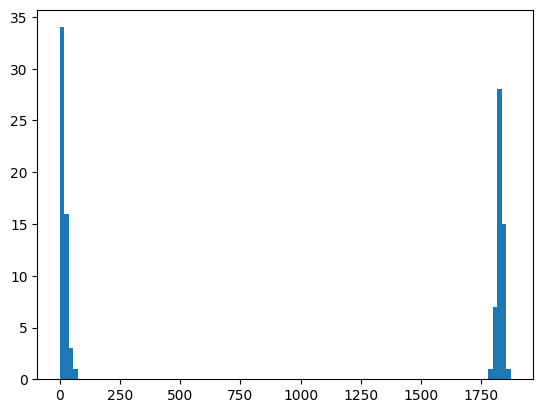

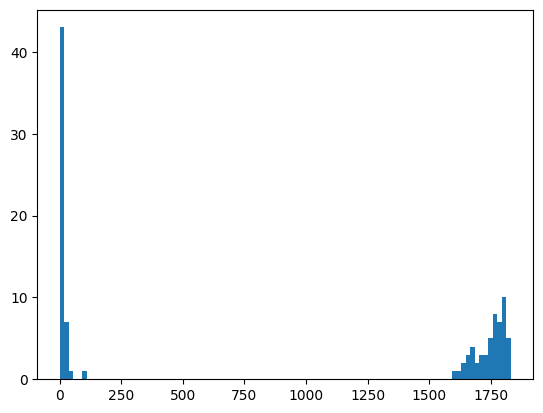

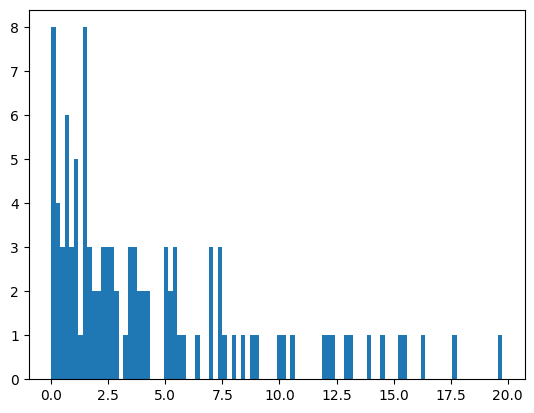

In [90]:
# make hist of x_diffs
plt.hist(stats['x_translation']['x_diffs'], bins=100)
plt.show()

# make hist of y_diffs
plt.hist(stats['y_translation']['y_diffs'], bins=100)
plt.show()

# make hist of z_diffs
plt.hist(stats['z_translation']['z_diffs'], bins=100)
plt.show()


In [96]:
outliers

{'x': [],
 'y': [],
 'z': [{'tile1': {'name': 'Tile_X_0005_Y_0006_Z_0000_ch_405.zarr',
    'position': (5, 6, 0),
    'transform': array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.69412582e+03],
           [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.45850908e+03],
           [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.76659878e+01]])},
   'tile2': {'name': 'Tile_X_0006_Y_0006_Z_0000_ch_405.zarr',
    'position': (6, 6, 0),
    'transform': array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.49521752e+03],
           [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.55903197e+03],
           [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 7.91786723e+00]])},
   'difference': np.float64(19.74812052514676)},
  {'tile1': {'name': 'Tile_X_0000_Y_0006_Z_0000_ch_405.zarr',
    'position': (0, 6, 0),
    'transform': array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
            -5.47859076e+03],
           [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+

{'x': np.float64(1813.3833830072751), 'y': np.float64(1765.6640432610025), 'z': np.float64(8.949455157893597)}

Largest X differences:

Difference: 1831.43 pixels
Tile 1: Tile_X_0006_Y_0000_Z_0000_ch_405.zarr at position (6, 0, 0)
Tile 2: Tile_X_0006_Y_0001_Z_0000_ch_405.zarr at position (6, 1, 0)

Difference: 1824.09 pixels
Tile 1: Tile_X_0005_Y_0000_Z_0000_ch_405.zarr at position (5, 0, 0)
Tile 2: Tile_X_0005_Y_0001_Z_0000_ch_405.zarr at position (5, 1, 0)

Difference: 1819.45 pixels
Tile 1: Tile_X_0006_Y_0002_Z_0000_ch_405.zarr at position (6, 2, 0)
Tile 2: Tile_X_0006_Y_0003_Z_0000_ch_405.zarr at position (6, 3, 0)

Difference: 1818.15 pixels
Tile 1: Tile_X_0000_Y_0001_Z_0000_ch_405.zarr at position (0, 1, 0)
Tile 2: Tile_X_0000_Y_0002_Z_0000_ch_405.zarr at position (0, 2, 0)

Difference: 1814.60 pixels
Tile 1: Tile_X_0004_Y_0000_Z_0000_ch_405.zarr at position (4, 0, 0)
Tile 2: Tile_X_0004_Y_0001_Z_0000_ch_405.zarr at position (4, 1, 0)

Difference: 1811.73 pixels
Tile 1: Tile_X_00

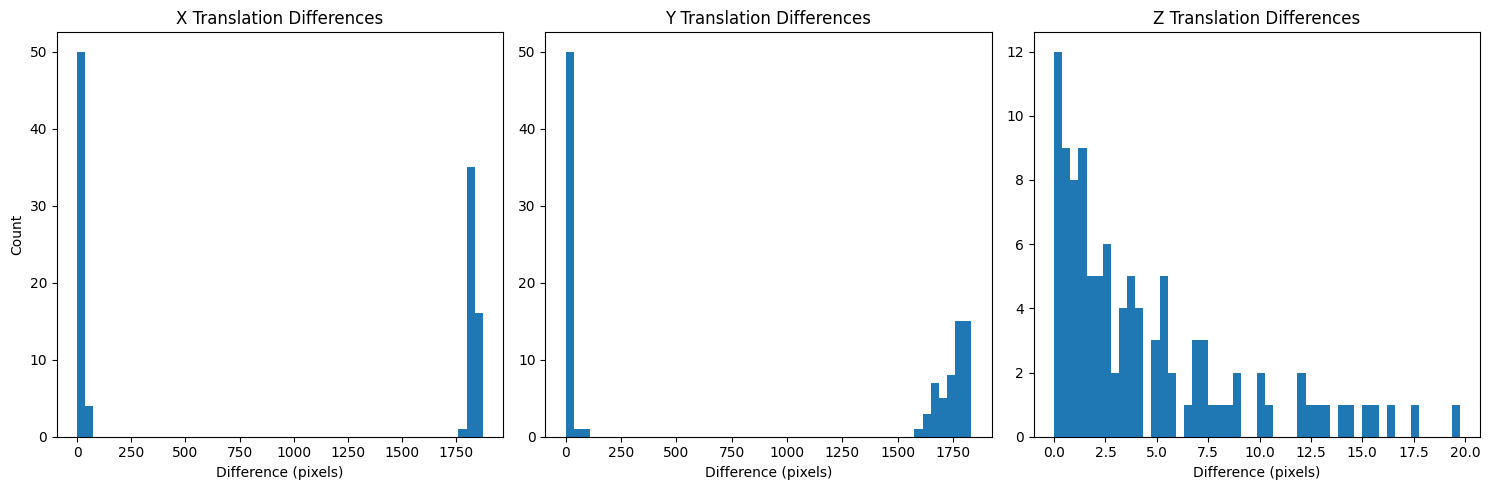

In [108]:
# TODO: account for non shift in middle tiles of x and y (add tile_dims + overlap to analyze_outlier_pairs)

outliers = stitch_utils.analyze_outlier_pairs(pairs, tile_names, net_transforms)

# Print information about the most extreme differences
print("\nLargest X differences:")
for o in outliers['y'][:10]:  # Show top 5
    print(f"\nDifference: {o['difference']:.2f} pixels")
    print(f"Tile 1: {o['tile1']['name']} at position {o['tile1']['position']}")
    print(f"Tile 2: {o['tile2']['name']} at position {o['tile2']['position']}")

# Plot histograms
stitch_utils.plot_transform_differences_histogram(stats)

pairs

net_transforms

# Plot tiles 

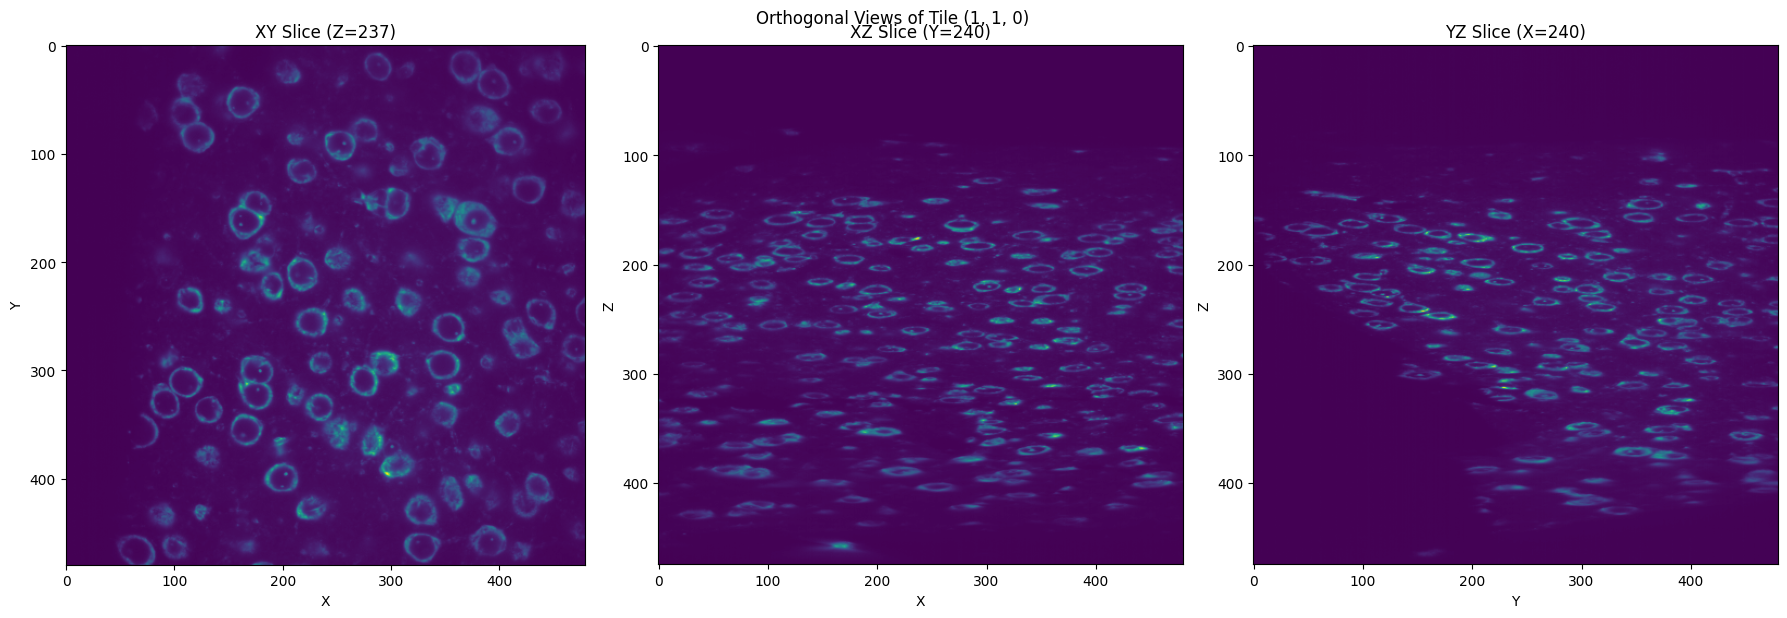

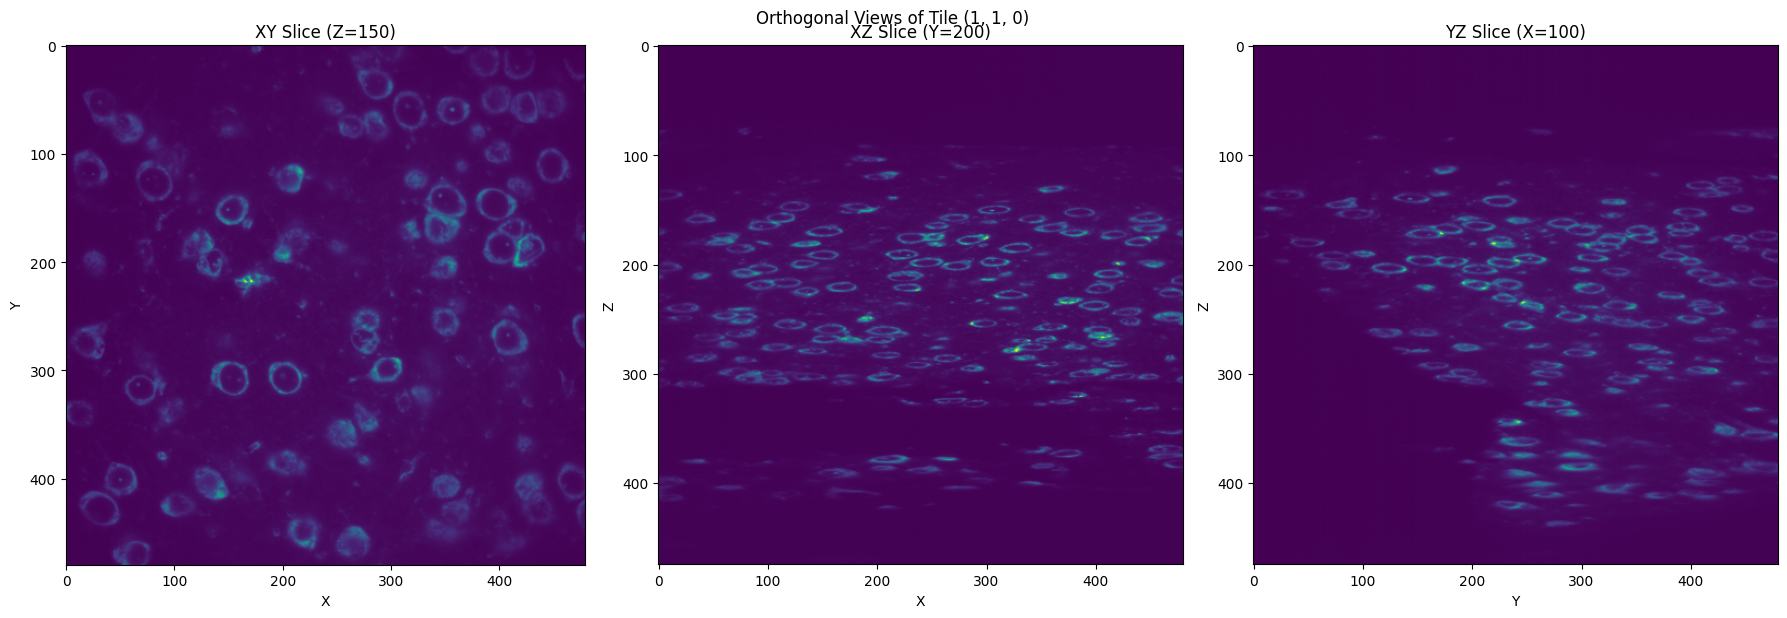

(<Figure size 1800x600 with 3 Axes>,
 (<Axes: title={'center': 'XY Slice (Z=150)'}, xlabel='X', ylabel='Y'>,
  <Axes: title={'center': 'XZ Slice (Y=200)'}, xlabel='X', ylabel='Z'>,
  <Axes: title={'center': 'YZ Slice (X=100)'}, xlabel='Y', ylabel='Z'>))

In [231]:
tile_name = pairs[20][0]
pyramid_level = 2
tile_data = stitch_utils.load_tile_data(tile_name, bucket_name, dataset_path, 
                                        pyramid_level,dims_order=(2,1,0))

# Use middle of volume
stitch_utils.plot_tile_orthogonal_views(tile_data, tile_name)

# Or specify custom center points
center_points = {'x': 100, 'y': 200, 'z': 150}
stitch_utils.plot_tile_orthogonal_views(tile_data, tile_name, center_points=center_points)

In [ ]:
# Acc

# Accutance


# get image slice

In [321]:
tile_1_name = pairs[56][0]
tile_2_name = pairs[56][1]

tile1_data = stitch_utils.load_tile_data(tile_1_name, bucket_name, dataset_path, pyramid_level)
tile2_data = stitch_utils.load_tile_data(tile_2_name, bucket_name, dataset_path, pyramid_level)

# slice 
z_slice = 300
tile1_slice = tile1_data[:,:,z_slice]
tile2_slice = tile2_data[:,:,z_slice]


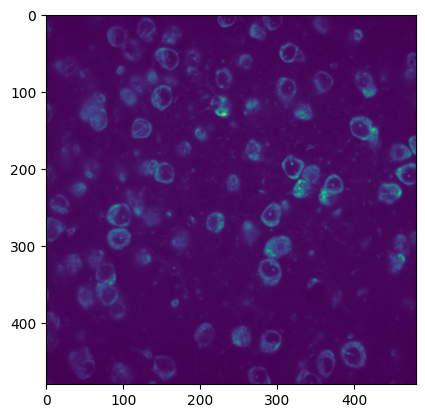

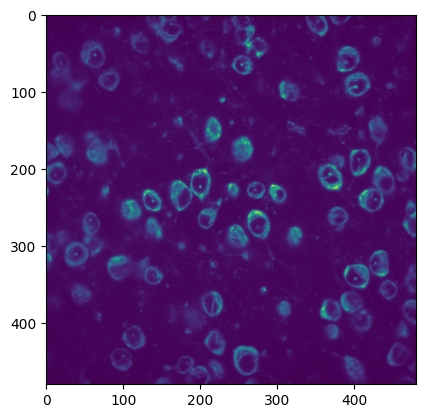

In [322]:
# plot the slices
plt.imshow(tile1_slice)
plt.show()  
plt.imshow(tile2_slice)
plt.show()



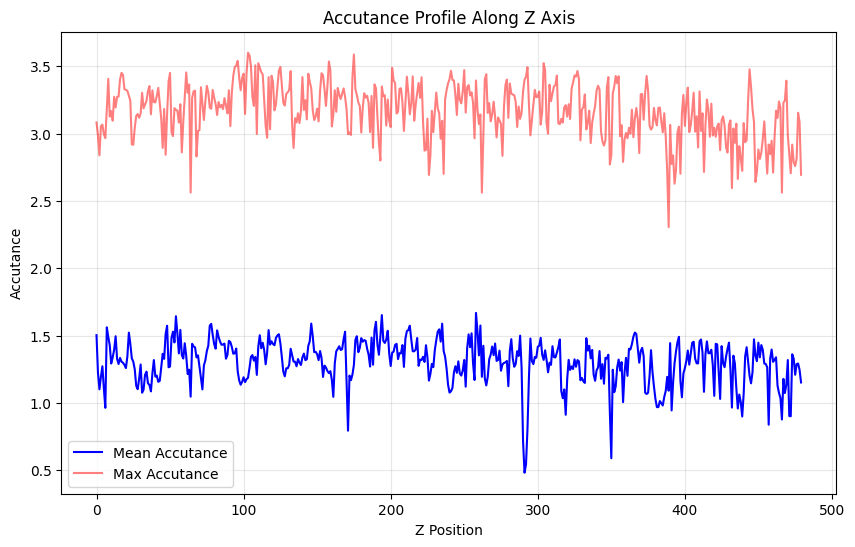

In [323]:
fig, ax, profile = stitch_utils.plot_accutance_profile(tile1_data, axis='z')

(<Figure size 1500x600 with 2 Axes>,
 [<Axes: title={'center': 'Accutance Profiles Comparison'}, xlabel='Z Position', ylabel='Accutance'>,
  <Axes: title={'center': 'Accutance Difference (Tile 1 - Tile 2)'}, xlabel='Z Position', ylabel='Accutance Difference'>],
 {'tile1': {'positions': range(0, 480),
   'mean_accutance': [np.float64(1.5031003700840482),
    np.float64(1.2218324723856056),
    np.float64(1.1008737904761254),
    np.float64(1.194118148893778),
    np.float64(1.2720692229759194),
    np.float64(1.1058786237571723),
    np.float64(0.9634519571003769),
    np.float64(1.5611636621180718),
    np.float64(1.4906725002223629),
    np.float64(1.4276979769843419),
    np.float64(1.2924379066887002),
    np.float64(1.3381762281567926),
    np.float64(1.394622083550531),
    np.float64(1.4948484635006871),
    np.float64(1.3265503225704651),
    np.float64(1.2887944334690633),
    np.float64(1.3340066175662795),
    np.float64(1.306220241307259),
    np.float64(1.2979731799661103),

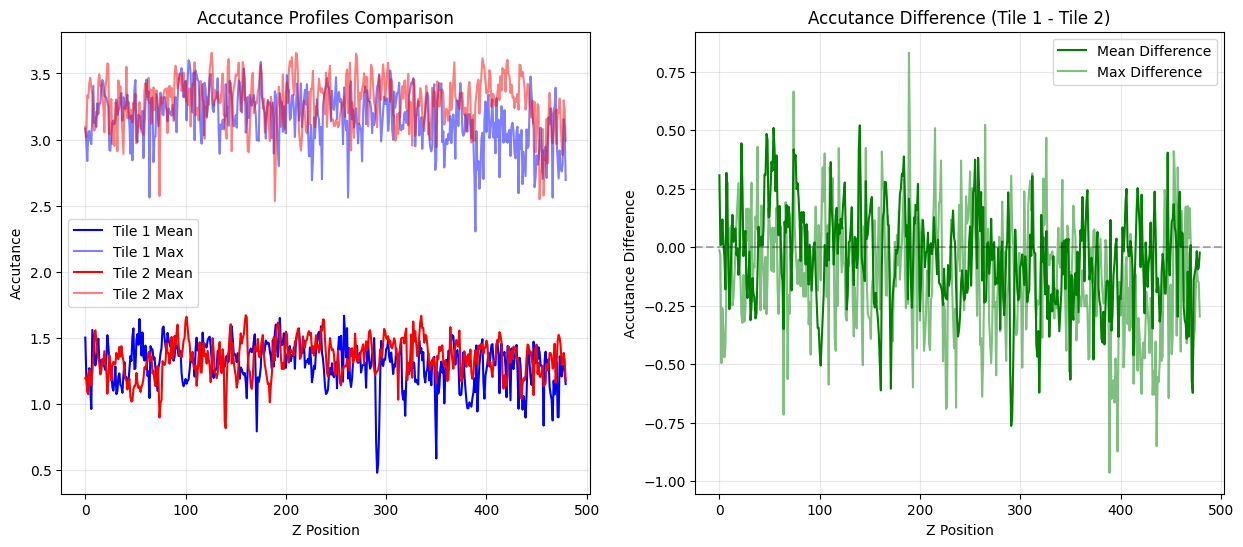

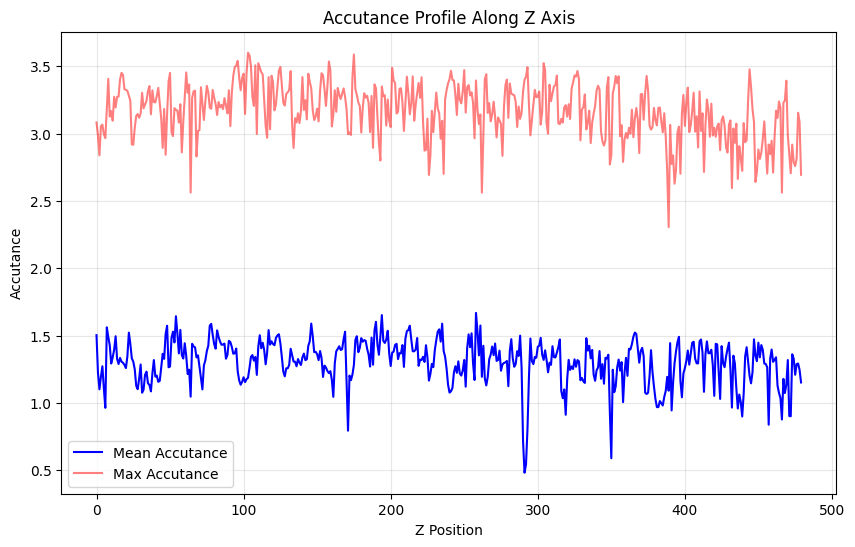

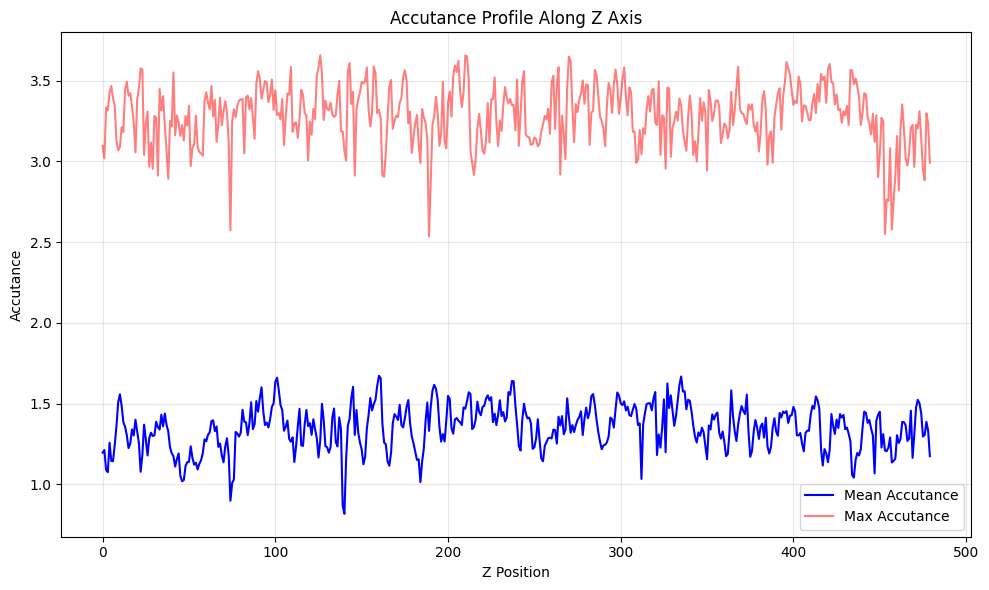

In [312]:
stitch_utils.plot_accutance_comparison(tile1_data, tile2_data, axis='z')

stitch_utils.plot_accutance_comparison(tile1_data, tile2_data, axis='z')

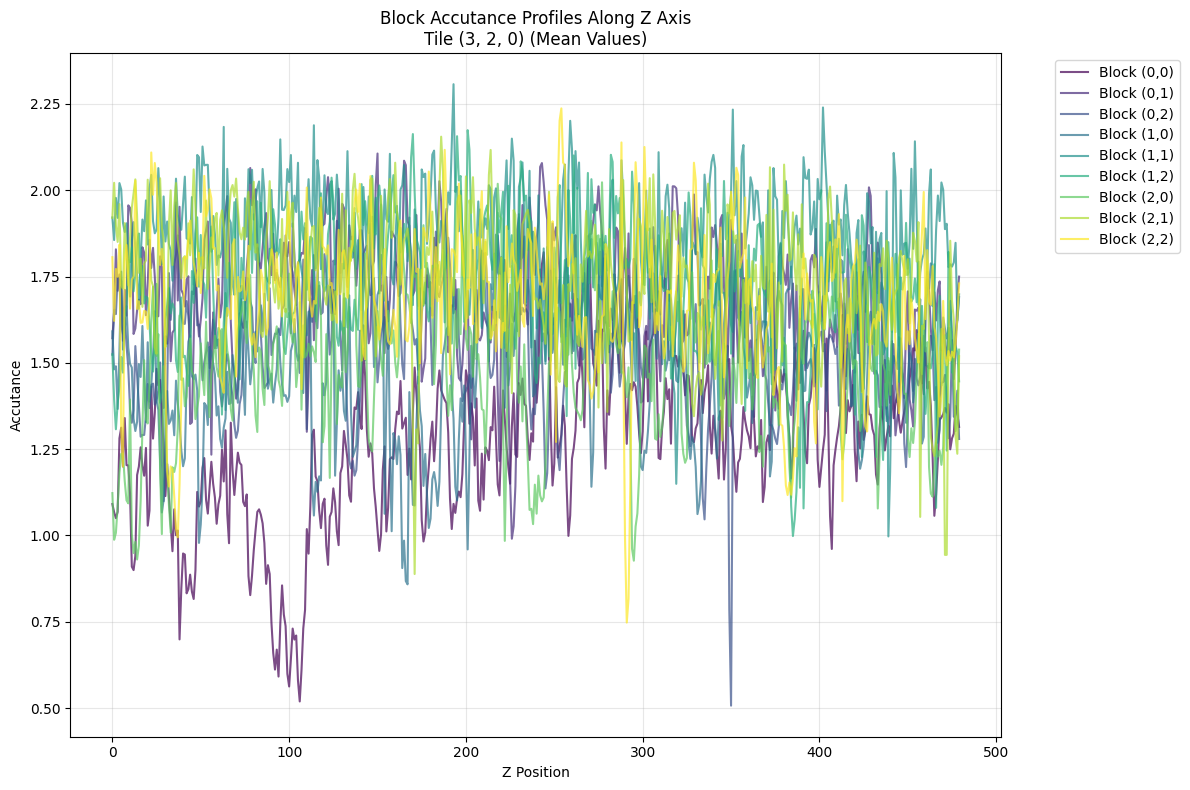

In [313]:
fig, ax, profiles = stitch_utils.plot_block_accutance_profiles(tile1_data, tile_1_name, axis='z')

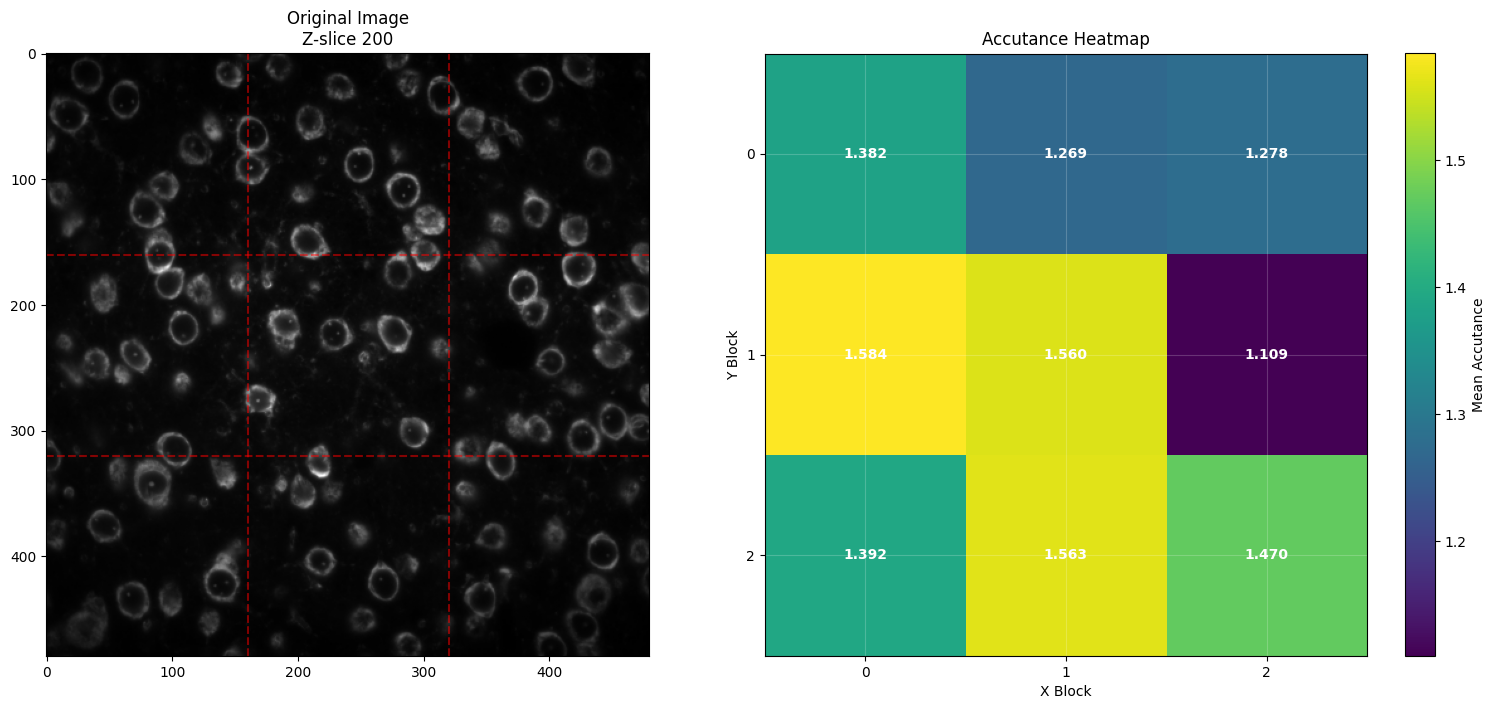

In [327]:
fig, ax, values = stitch_utils.plot_block_accutance_heatmap(tile1_data, z_slice=200, n_blocks=3, percentile_threshold=99)

fig, ax, profiles = stitch_utils.plot_block_accutance_profiles(tile1_data, tile_1_name, axis='z')

## All tiles heatmap

In [ ]:
grid_data = stitch_utils.calculate_tile_grid_block_accutance(
    tile_dict, transforms, tile_names, bucket_name, dataset_path,
    z_slice=100, n_blocks=3, pyramid_level=2
)


## PLOT DATA OF ADJACENT TILES

# Plot a single pair
pair_n = 15

fig, ax = stitch_utils.plot_adjacent_tile_pair(
    pairs[pair_n][0], pairs[pair_n][1],  # First pair of tiles
    net_transforms, tile_names,
    bucket_name, dataset_path,
    pyramid_level=3  # Use lower resolution for faster plotting
)

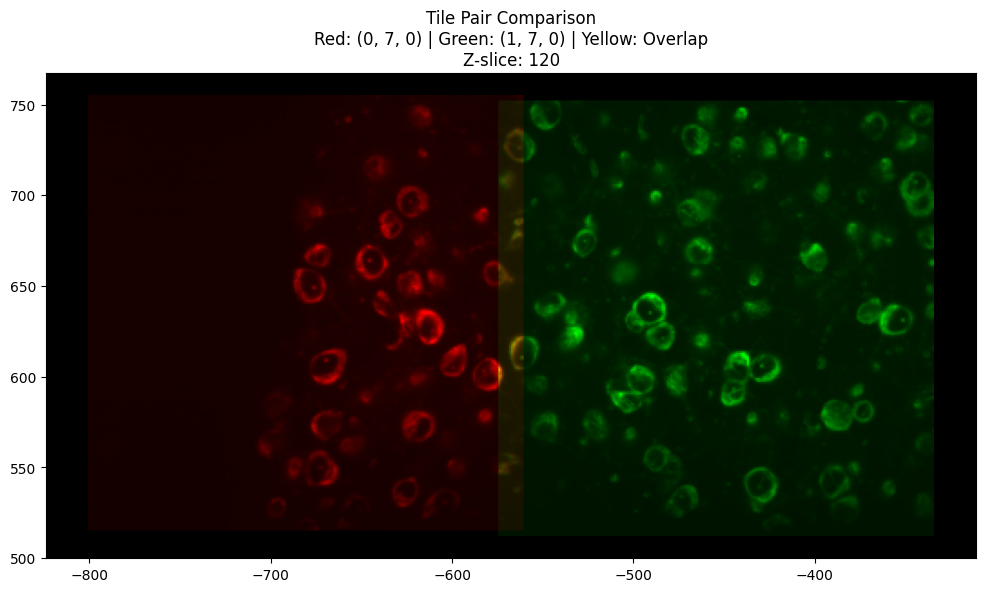

In [283]:
# Plot a single pair
pair_n = 15

fig, ax = stitch_utils.plot_adjacent_tile_pair(
    pairs[pair_n][0], pairs[pair_n][1],  # First pair of tiles
    net_transforms, tile_names,
    bucket_name, dataset_path,
    pyramid_level=3  # Use lower resolution for faster plotting
)

Z offset 1: 4
Z offset 2: 4


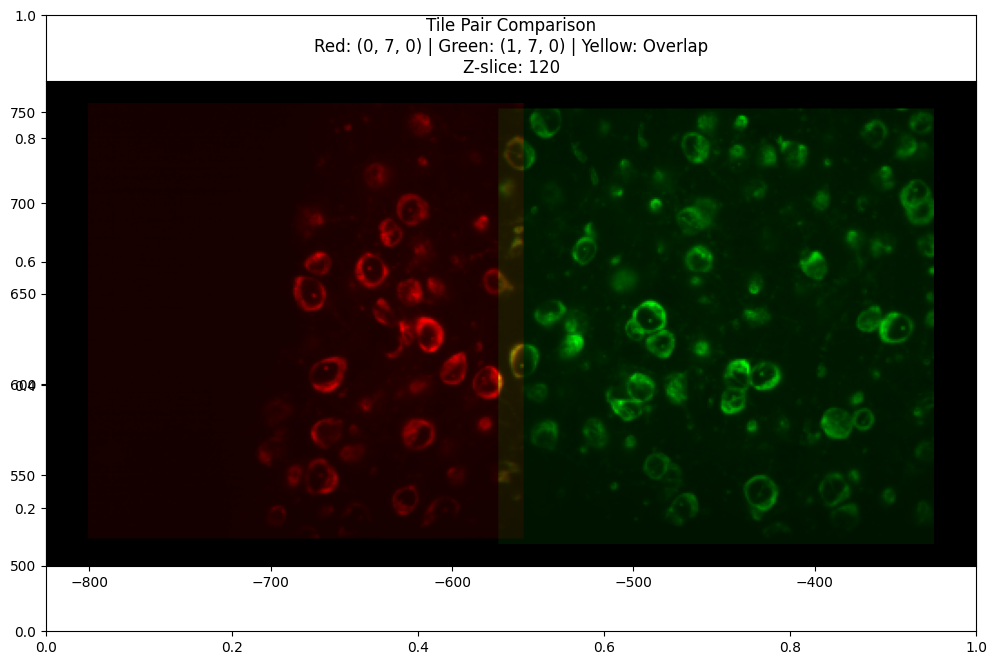

In [277]:
# Plot a single pair
pair_n = 15

fig, ax = stitch_utils.plot_adjacent_tile_pair(
    pairs[pair_n][0], pairs[pair_n][1],  # First pair of tiles
    net_transforms, tile_names,
    bucket_name, dataset_path,
    pyramid_level=3  # Use lower resolution for faster plotting
)



Z offset 1: 17
Z offset 2: 15


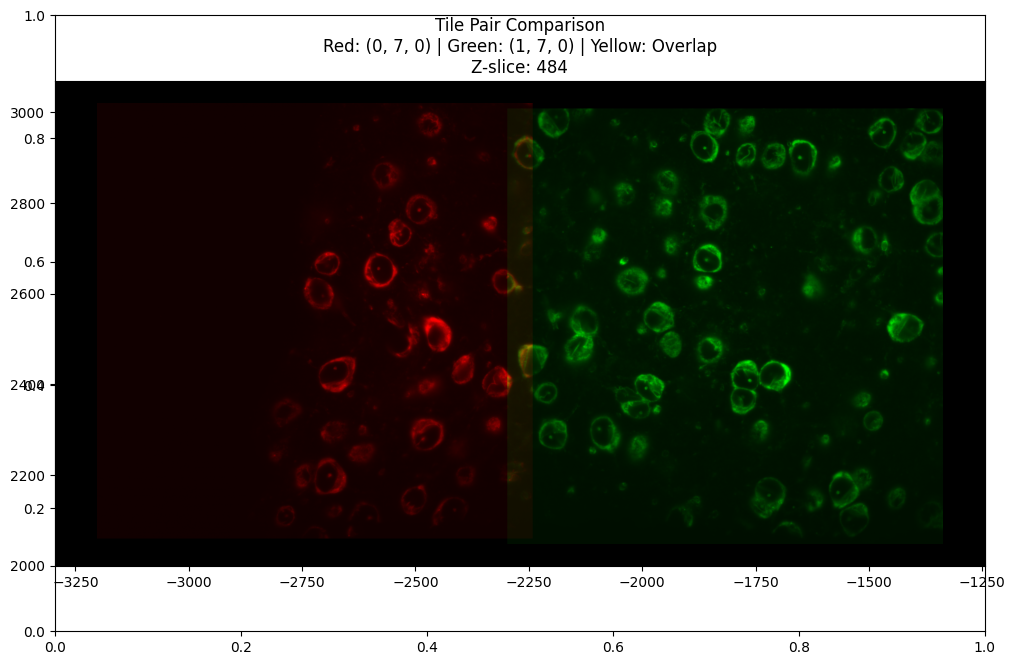

In [280]:
# Plot a single pair
pair_n = 15

fig, ax = stitch_utils.plot_adjacent_tile_pair(
    pairs[pair_n][0], pairs[pair_n][1],  # First pair of tiles
    net_transforms, tile_names,
    bucket_name, dataset_path,
    pyramid_level=1  # Use lower resolution for faster plotting
)


Z offset 1: 4
Z offset 2: 4


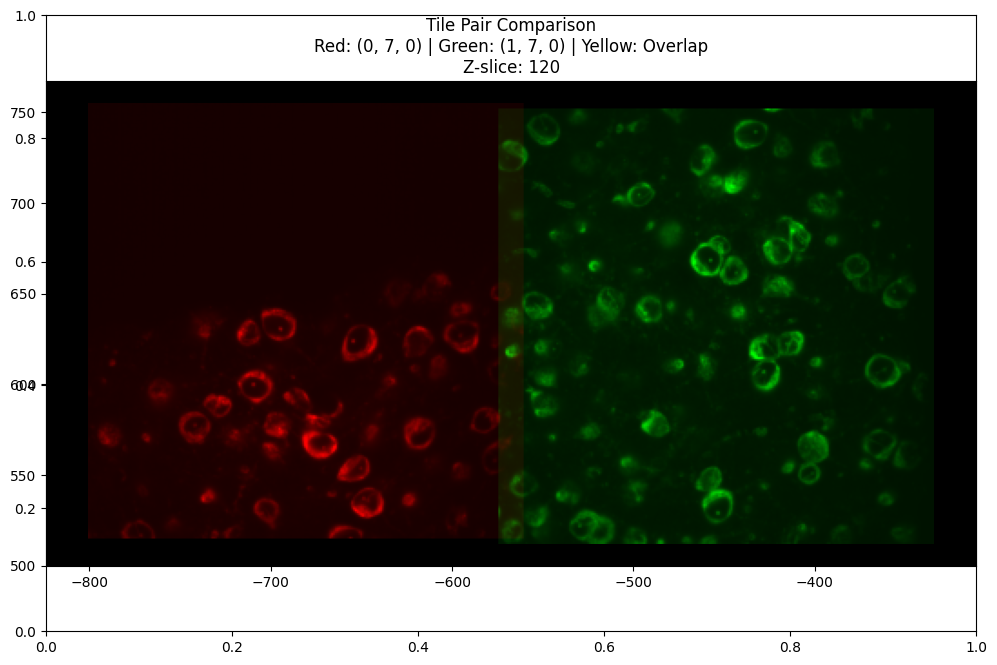

In [252]:
# Plot a single pair
pair_n = 15

fig, ax = stitch_utils.plot_adjacent_tile_pair(
    pairs[pair_n][0], pairs[pair_n][1],  # First pair of tiles
    net_transforms, tile_names,
    bucket_name, dataset_path,
    pyramid_level=3  # Use lower resolution for faster plotting
)

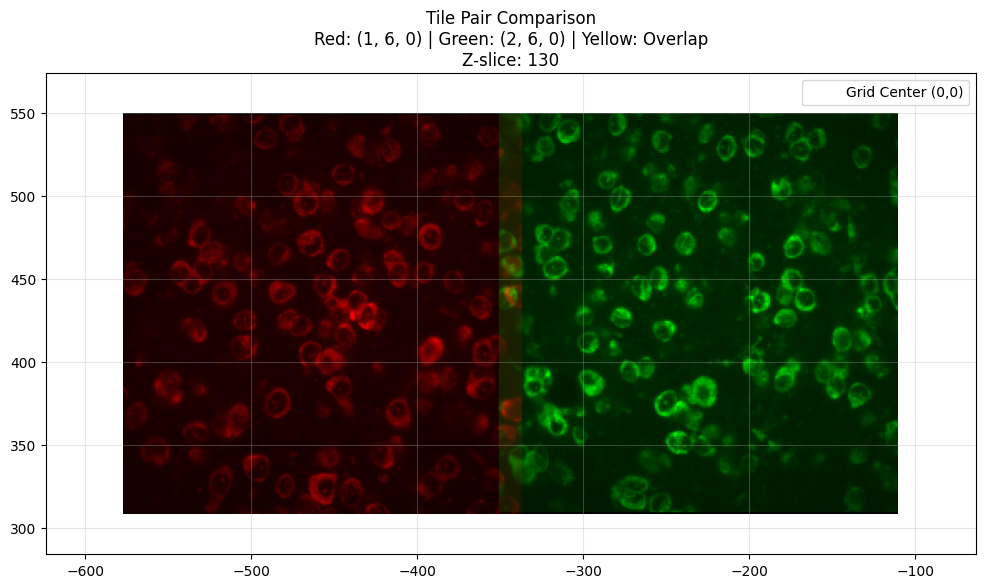

In [242]:
pair_n = 30

fig, ax = stitch_utils.plot_adjacent_tile_pair(
    pairs[pair_n][0], pairs[pair_n][1],  # First pair of tiles
    net_transforms, tile_names,
    bucket_name, dataset_path,
    pyramid_level=3  # Use lower resolution for faster plotting
)

# Plot a single pair
pair_n = 40

fig, ax = stitch_utils.plot_adjacent_tile_pair(
    pairs[pair_n][0], pairs[pair_n][1],  # First pair of tiles
    net_transforms, tile_names,
    bucket_name, dataset_path,
    pyramid_level=3  # Use lower resolution for faster plotting
)



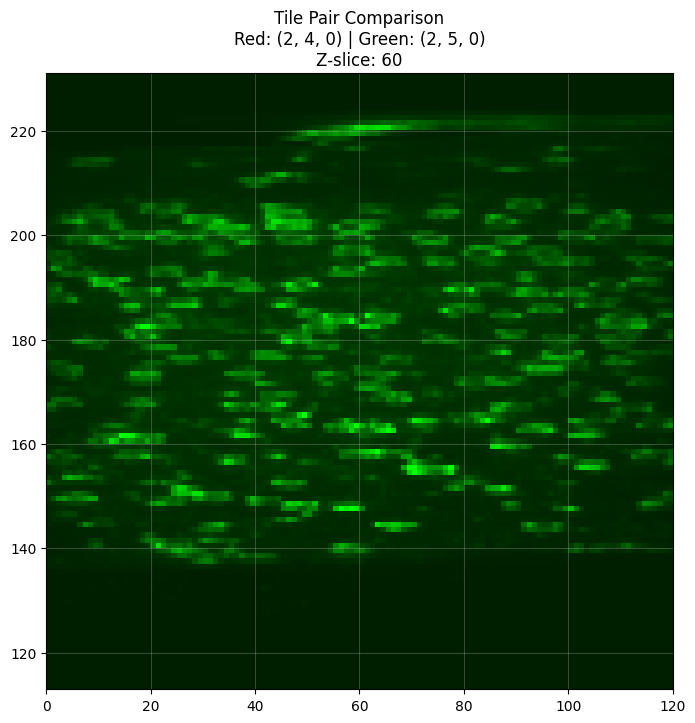

TypeError: cannot unpack non-iterable NoneType object

In [169]:
# Plot a single pair
pair_n = 42

fig, ax = stitch_utils.plot_adjacent_tile_pair(
    pairs[pair_n][0], pairs[pair_n][1],  # First pair of tiles
    net_transforms, tile_names,
    bucket_name, dataset_path,
    pyramid_level=4  # Use lower resolution for faster plotting
)



(480, 480, 475)
(480, 480, 475)


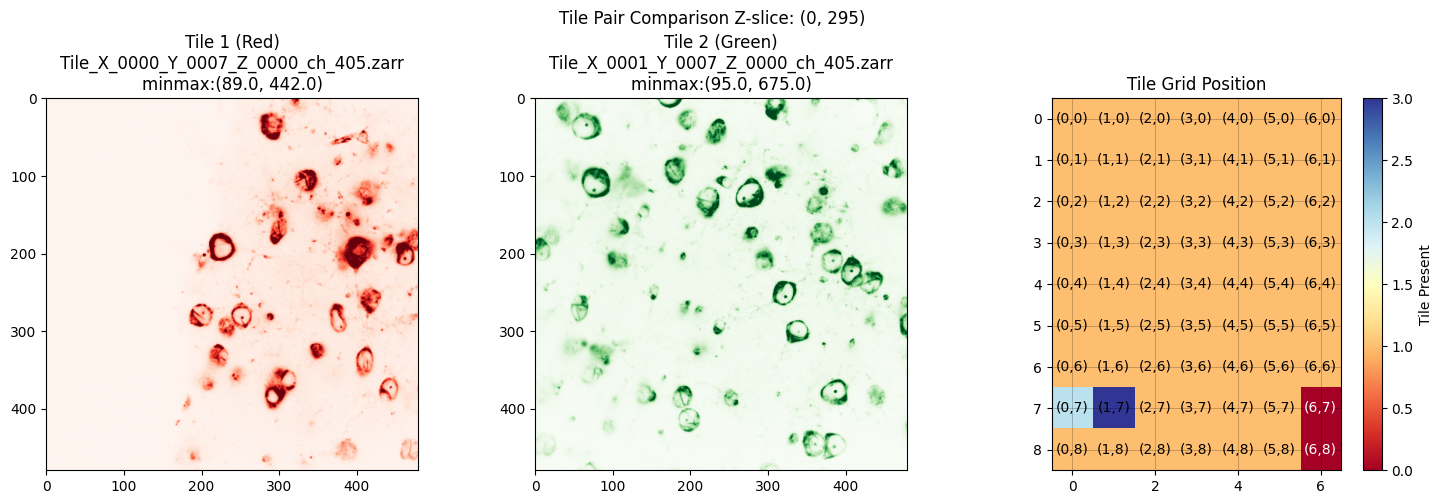

In [244]:
pair_n = 15
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
stitch_utils.plot_tile_comparison(tile1_name, tile2_name, 
                                  bucket_name, dataset_path,
                                  tile_dict=tile_names,
                                  pyramid_level=2, 
                                  z_slice=(0,295),
                                  minmax_percentile= (1.5,99))

(475, 480, 480)
(475, 480, 480)


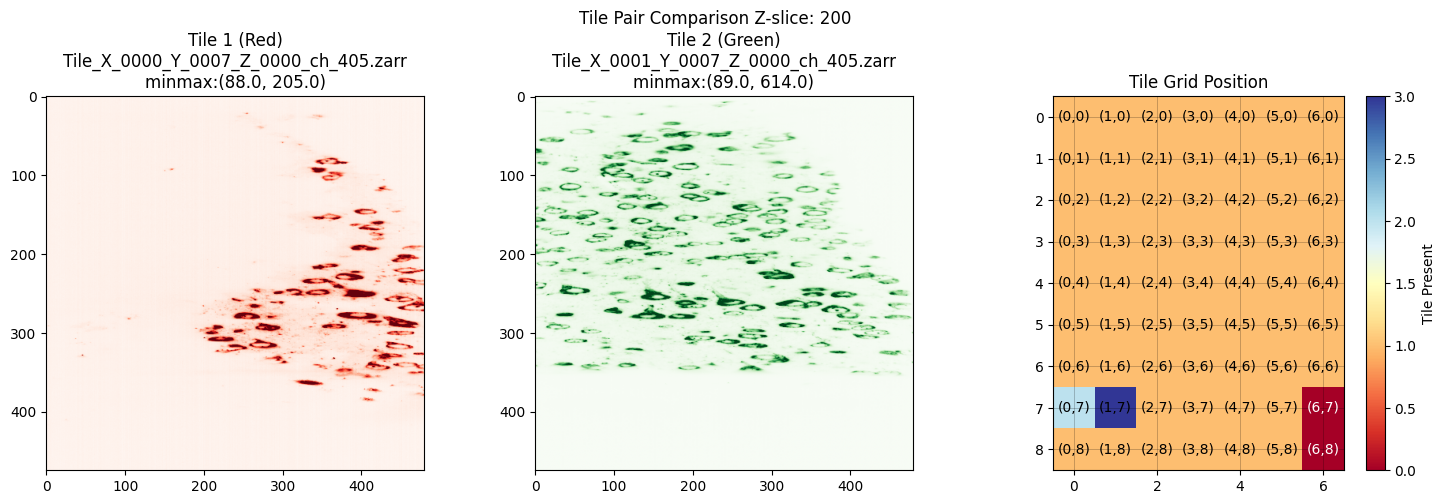

In [140]:
pair_n = 15
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
stitch_utils.plot_tile_comparison(tile1_name, tile2_name, 
                                  bucket_name, dataset_path,
                                  tile_dict=tile_names,
                                  pyramid_level=2, 
                                  z_slice=200,
                                  minmax_percentile= (1.5,99))

In [ ]:
# Plot multiple pairs
stitch_utils.plot_all_adjacent_pairs(
    pairs, transforms, tile_names,
    bucket_name, dataset_path,
    pyramid_level=2,
    max_pairs=5,  # Only plot first 5 pairs
    save=True,
    output_dir='tile_pair_plots'
)

plot_tiles_on_grid(
    tile1_name, tile2_name, 
    net_transforms, tile_names,
    bucket_name, dataset_path,
    n_x_tiles=7, n_y_tiles=9,  # adjust based on your grid size
    z_slice=237, 
    pyramid_level=0,
    color1='red', 
    color2='green'
)

plot_tiles_on_grid(
    tile1_name, tile2_name, 
    net_transforms, tile_names,
    bucket_name, dataset_path,
    n_x_tiles=7, n_y_tiles=9,  # adjust based on your grid size
    z_slice=237, 
    pyramid_level=0,
    color1='red', 
    color2='green'
)

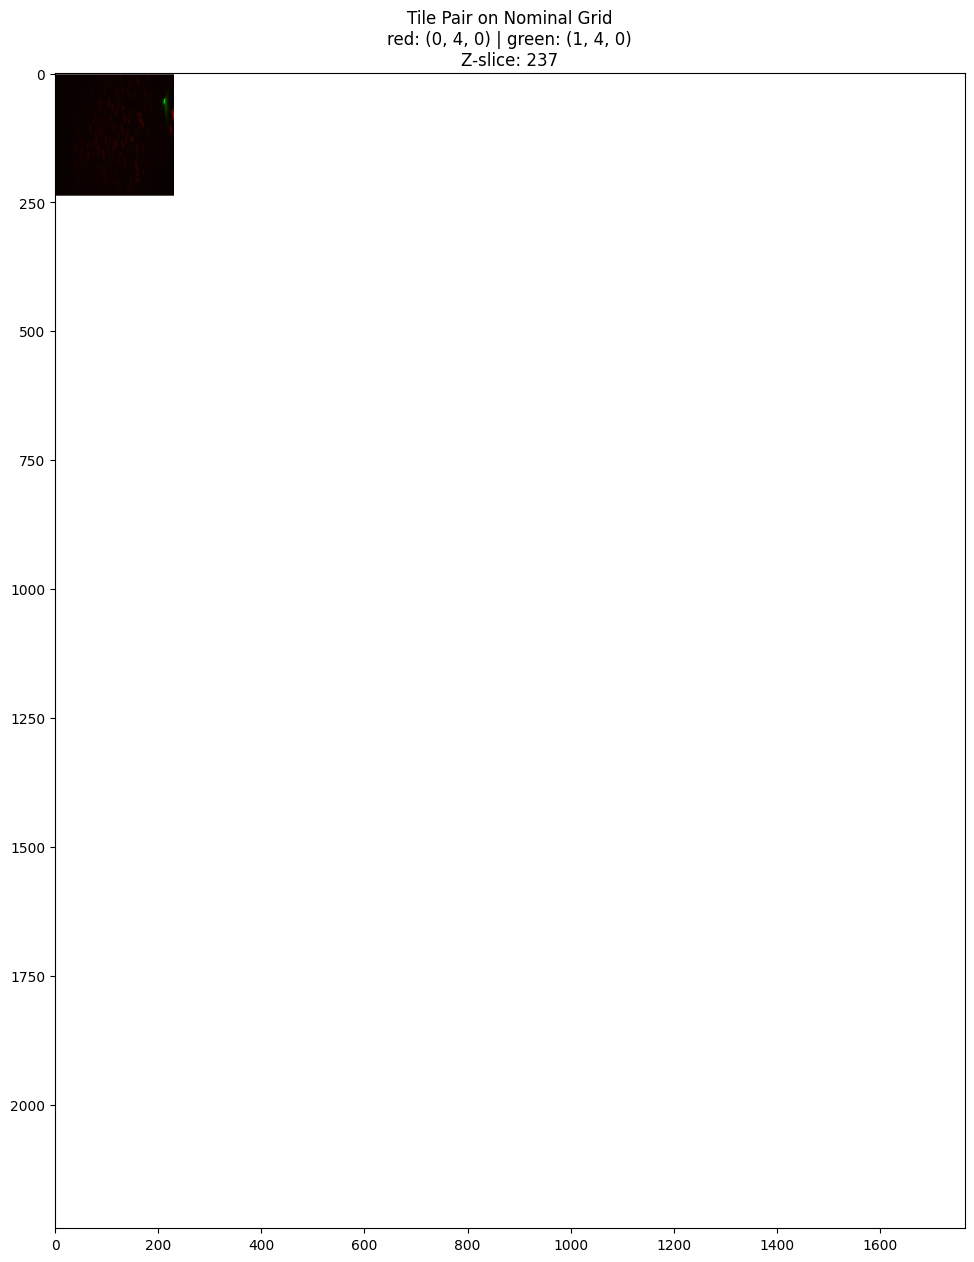

(<Figure size 1500x1500 with 1 Axes>,
 <Axes: title={'center': 'Tile Pair on Nominal Grid\nred: (0, 4, 0) | green: (1, 4, 0)\nZ-slice: 237'}>)

In [199]:
pair_n = 9
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]

stitch_utils.plot_tiles_on_grid(
    tile1_name, tile2_name, 
    net_transforms, tile_names,
    bucket_name, dataset_path,
    n_x_tiles=7, n_y_tiles=9,  # adjust based on your grid size
    z_slice=237, 
    pyramid_level=3,
    color1='red', 
    color2='green'
)

## transforms x,y,z

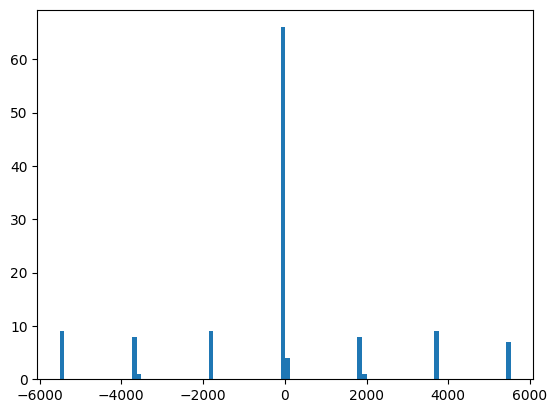

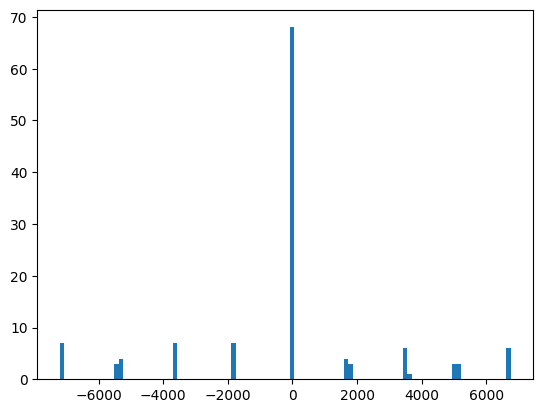

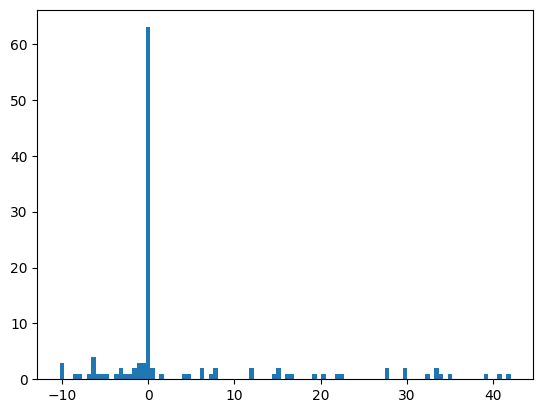

In [203]:
xt,yt,zt = stitch_utils.extract_x_y_z_transforms(net_transforms)
plt.hist(xt, bins=100)
plt.show()
plt.hist(yt, bins=100)
plt.show()
plt.hist(zt, bins=100)
plt.show()

# Grid and heatmap

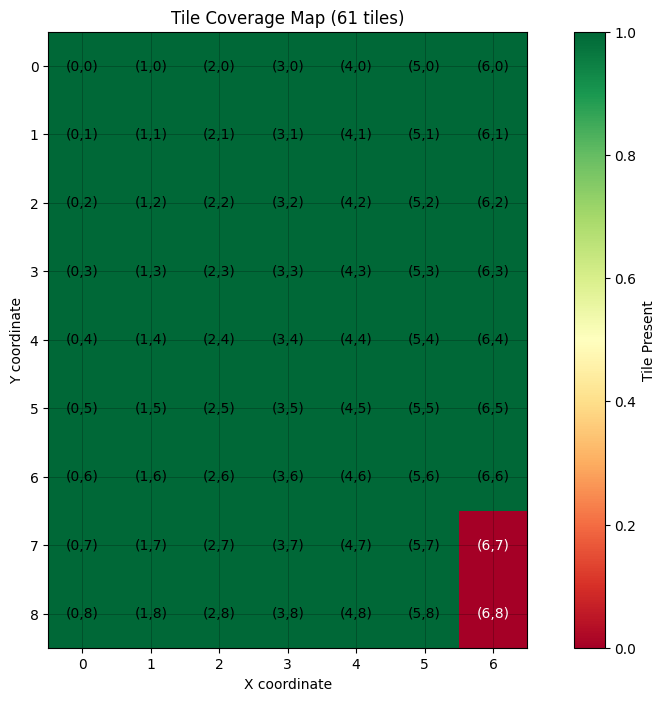

In [21]:
analysis = stitch_utils.analyze_tile_grid(tile_names)


In [27]:
net_transforms

defaultdict(<function stitch_utils.calculate_net_transforms.<locals>.<lambda>()>,
            {0: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                     -5.50215065e+03],
                    [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
                     -7.20201307e+03],
                    [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
                     -8.27947787e+00]]),
             1: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                     -5.46489640e+03],
                    [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
                     -5.41672993e+03],
                    [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
                     -6.70593816e+00]]),
             2: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                     -5.47241738e+03],
                    [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
                     -3.59857546e+03],
                 

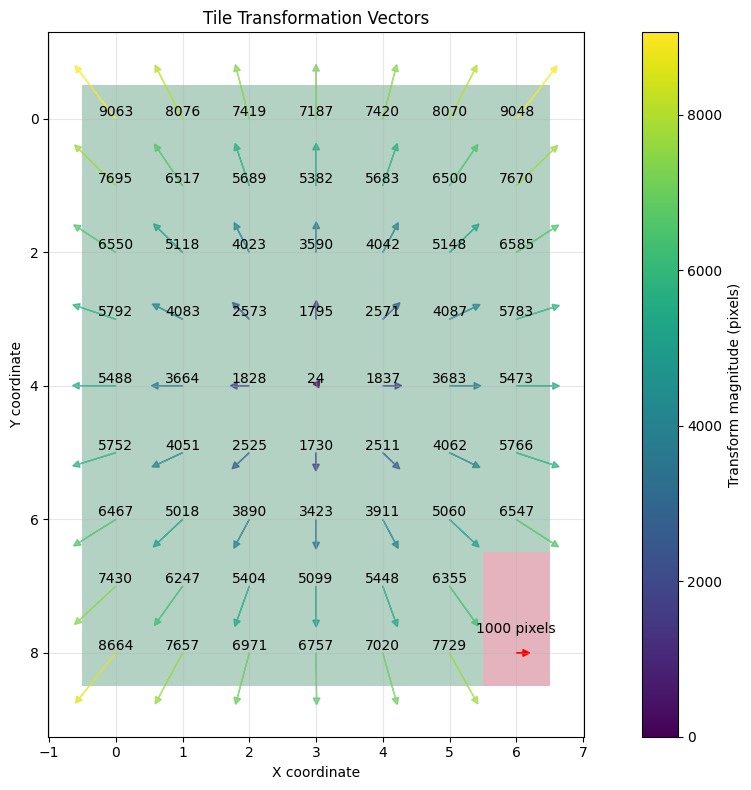

In [35]:
stitch_utils.plot_tile_transforms(tile_names, net_transforms, analysis['coverage_map'])

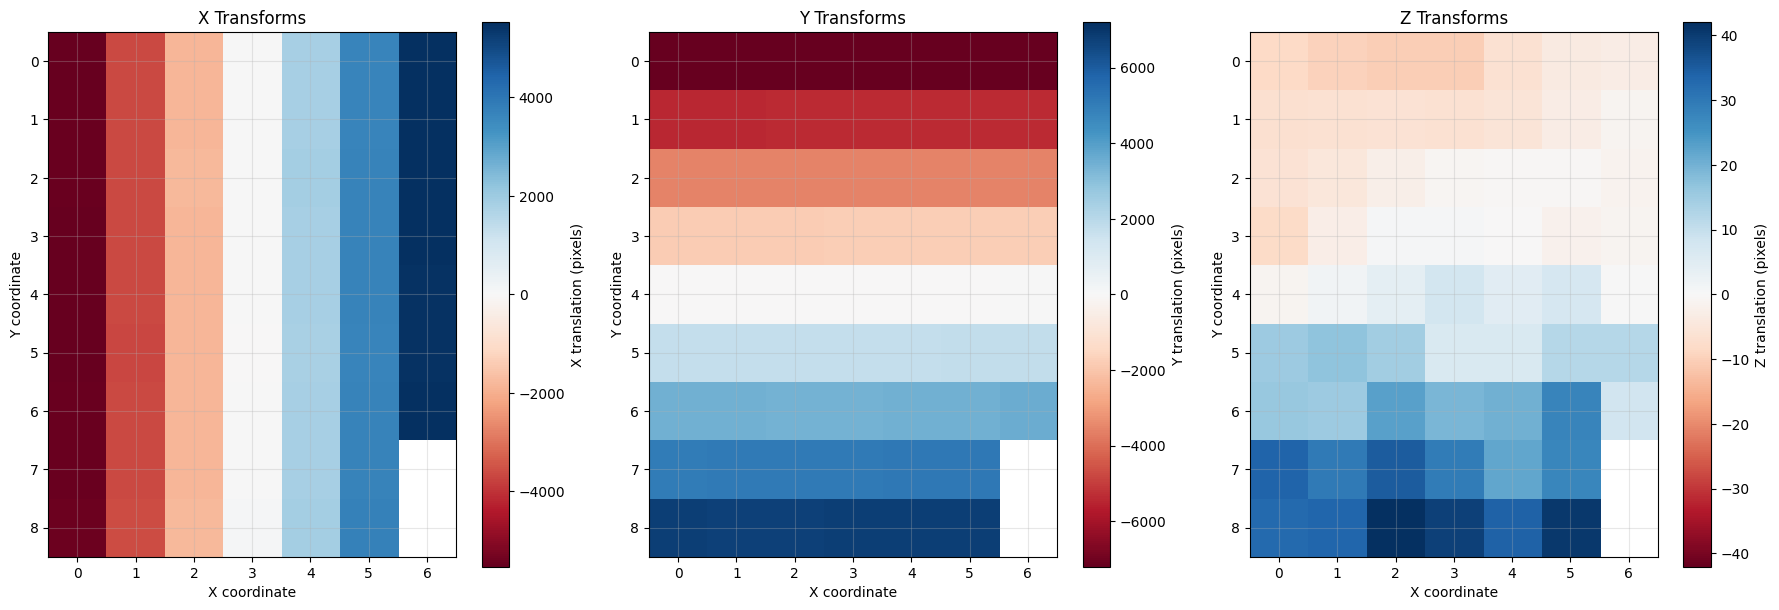

(array([[-5.50215065e+03, -3.67081234e+03, -1.83777015e+03,
          2.18969224e+00,  1.83873500e+03,  3.66814678e+03,
          5.50219042e+03],
        [-5.46489640e+03, -3.64215065e+03, -1.81738950e+03,
          1.57690324e+01,  1.84628958e+03,  3.67082245e+03,
          5.49555875e+03],
        [-5.47241738e+03, -3.64220507e+03, -1.81356260e+03,
          2.58593741e+01,  1.86426237e+03,  3.69754773e+03,
          5.52908656e+03],
        [-5.48803397e+03, -3.64846172e+03, -1.82172429e+03,
          2.07415258e+01,  1.85359974e+03,  3.68346977e+03,
          5.51003448e+03],
        [-5.48826338e+03, -3.66409669e+03, -1.82752770e+03,
          1.30292570e+01,  1.83692984e+03,  3.68320925e+03,
          5.47266189e+03],
        [-5.49598739e+03, -3.67229620e+03, -1.84572199e+03,
         -1.30064112e+01,  1.81373008e+03,  3.65414462e+03,
          5.47814462e+03],
        [-5.47859076e+03, -3.65563470e+03, -1.84156892e+03,
          4.79174788e+00,  1.84071073e+03,  3.69412582e+03

In [43]:
stitch_utils.plot_transform_heatmaps(tile_names, 
                                     net_transforms, 
                                     analysis['coverage_map'],
                                     remove_nominal_transform=False)

overlap = 0.05
tile_dims=(1820,1820,1902)

In [62]:
tile_dims = (1902, 1920, 1920)
overlap = 0.05
tile_overlap_adjust = 1 - overlap
tile_dims = tuple(int(dim * tile_overlap_adjust) for dim in tile_dims)
tile_dims


(1806, 1824, 1824)

[-5420.7 -3613.8 -1806.9     0.   1806.9  3613.8  5420.7]
[-7296. -5472. -3648. -1824.     0.  1824.  3648.  5472.  7296.]


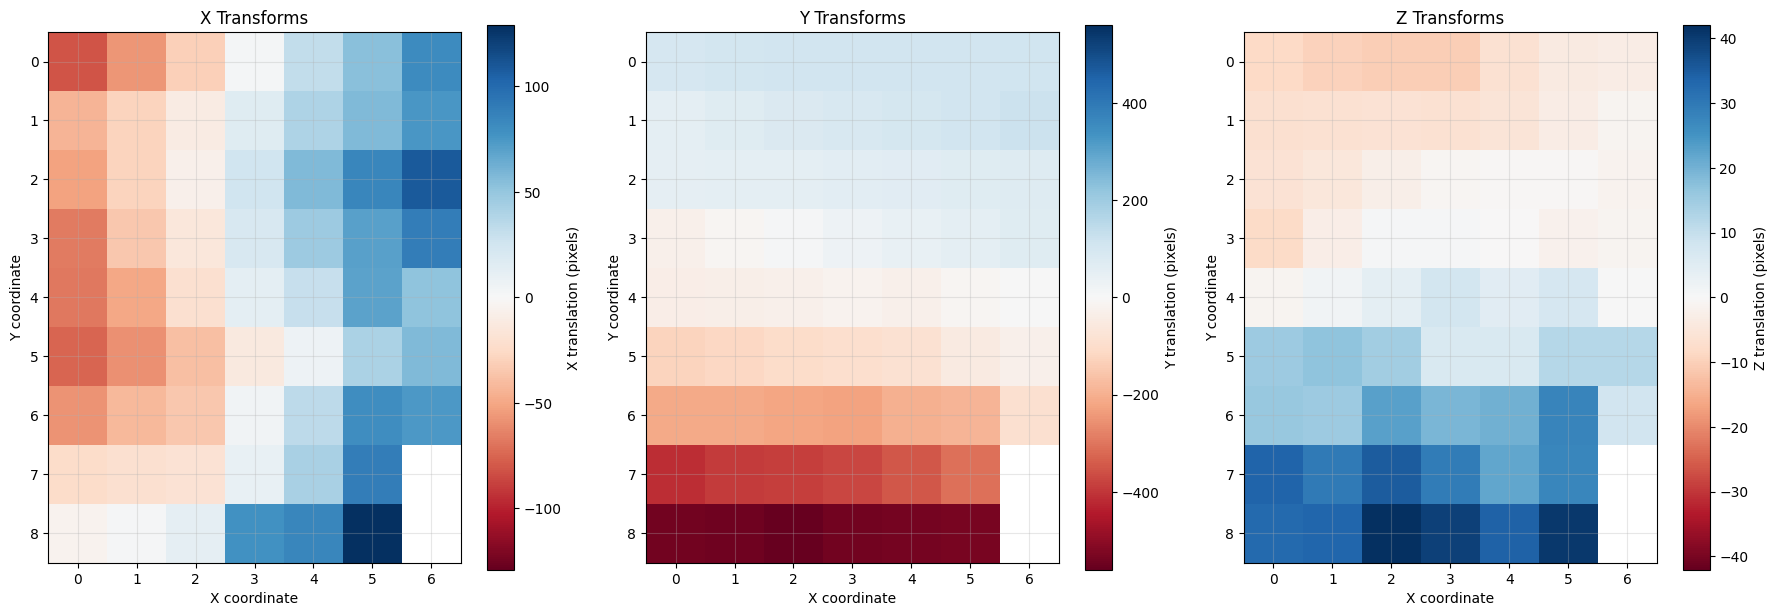

(array([[-81.45065242, -57.01234496, -30.87015018,   2.18969224,
          31.83499922,  54.3467818 ,  81.49041773],
        [-44.19640323, -28.35065242, -10.48950461,  15.76903242,
          39.38957899,  57.02244508,  74.85874696],
        [-51.71737504, -28.40506947,  -6.66260473,  25.85937406,
          57.36237402,  83.74772889, 108.38655692],
        [-67.3339678 , -34.66172172, -14.82429407,  20.74152575,
          46.69973744,  69.66976515,  89.3344767 ],
        [-67.56338233, -50.29668776, -20.62770384,  13.02925703,
          30.02984047,  69.40924585,  51.96188954],
        [-75.28739458, -58.4961993 , -38.82199131, -13.0064112 ,
           6.83007598,  40.34462438,  57.44462438],
        [-57.890761  , -41.83470397, -34.66892128,   4.79174788,
          33.81073495,  80.32581536,  74.51752229],
        [-23.69231533, -21.06754034, -18.63200565,   9.35020259,
          41.97275405,  89.31667334,          nan],
        [ -4.17071151,   1.67005078,  11.34018252,  77.9542412 ,

In [76]:
tile_dims = (1902, 1920, 1920)
stitch_utils.plot_transform_heatmaps(tile_names, 
                                     net_transforms, 
                                     analysis['coverage_map'],
                                     remove_nominal_transform=True,
                                     tile_dims=tile_dims,
                                     overlap=0.05)

s3://aind-open-data/HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2
s3://aind-open-data/HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0001_Z_0000_ch_405.zarr/2


TypeError: Invalid shape (230400,) for image data

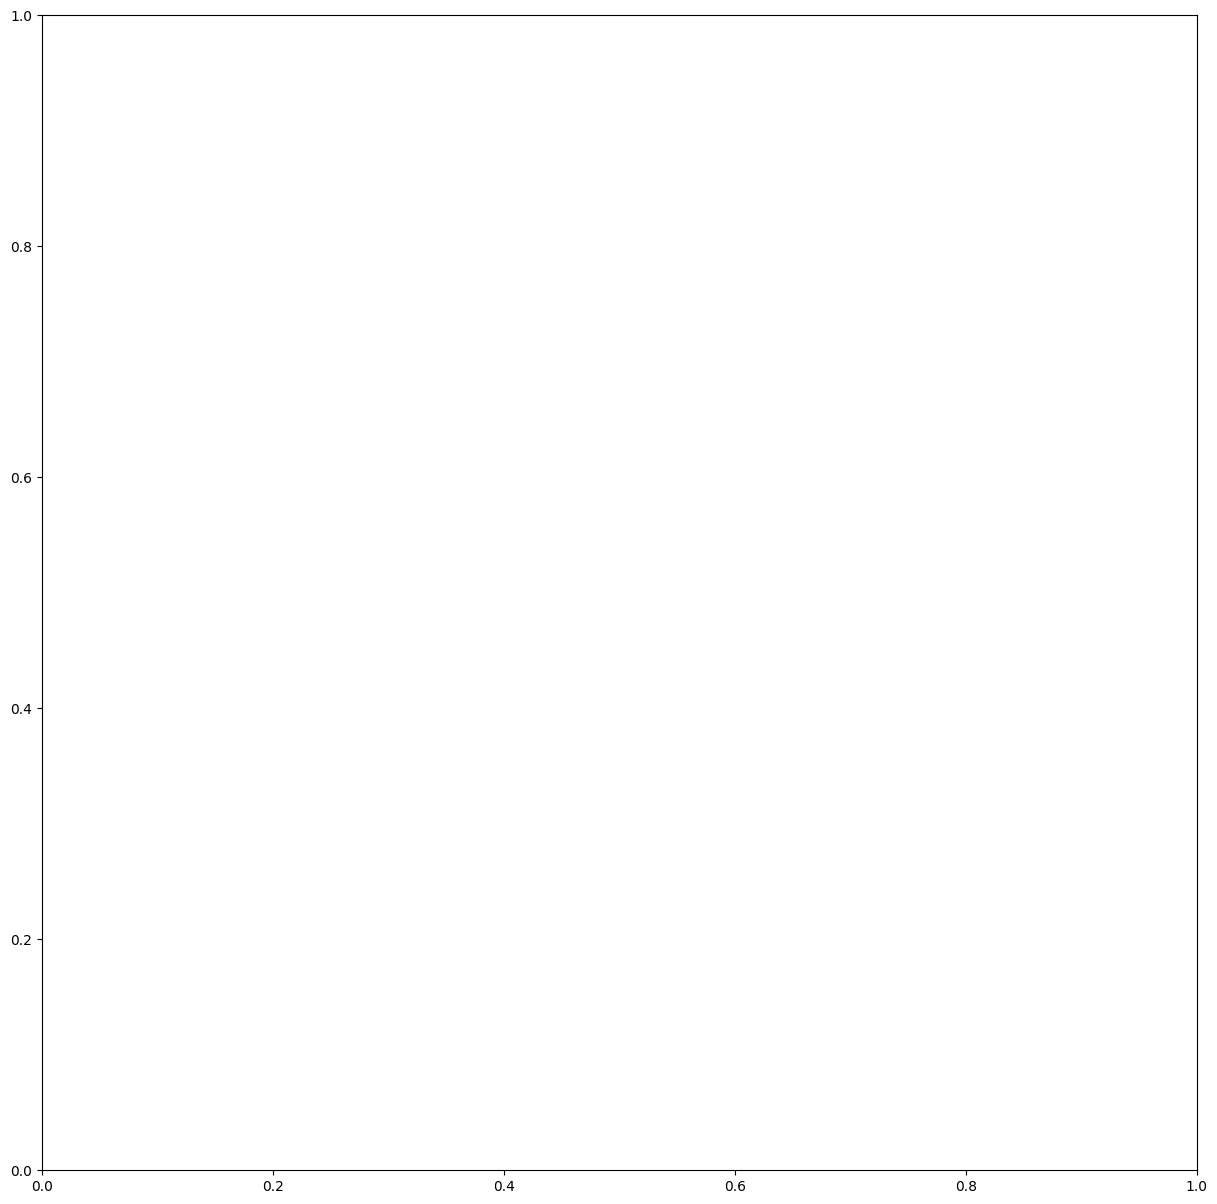

In [165]:
import numpy as np
import matplotlib.pyplot as plt

def load_tile_data(dataset_path, tile_path, pyramid_level=2):
    """Load a tile from S3"""
    zarr_path = f"s3://{bucket_name}/{dataset_path}{tile_path}/{pyramid_level}"
    print(zarr_path)
    return da.from_zarr(url=zarr_path, storage_options={'anon': False}).squeeze()

def transform_coordinates(shape, transform):
    """Get pixel coordinates after transform"""
    z, y, x = np.meshgrid(
        np.arange(shape[0]), 
        np.arange(shape[1]), 
        np.arange(shape[2]), 
        indexing='ij'
    )
    ones = np.ones_like(x)
    coords = np.stack([x, y, z, ones], axis=-1)
    
    # Apply transform to each point
    transformed = np.einsum('ij,...j->...i', transform, coords)
    return transformed[..., :3]

def plot_adjacent_tiles(tile1_name, tile2_name, tile_data, transforms, z_slice=0):
    """
    Plot two adjacent tiles with their transformations applied
    Args:
        tile1_name: Name of first tile
        tile2_name: Name of second tile
        tile_data: Dictionary mapping tile names to their 3D numpy arrays
        transforms: Dictionary mapping tile names to their transformation matrices
        z_slice: Which Z slice to plot
    """
    # Get the data and transforms
    data1 = tile_data[tile1_name][z_slice]  # Get 2D slice
    data2 = tile_data[tile2_name][z_slice]
    transform1 = transforms[tile1_name]
    transform2 = transforms[tile2_name]
    
    # Create corner points for each tile (in original space)
    h1, w1 = data1.shape
    corners1 = np.array([
        [0, 0, 1],
        [w1, 0, 1],
        [w1, h1, 1],
        [0, h1, 1]
    ])
    
    h2, w2 = data2.shape
    corners2 = np.array([
        [0, 0, 1],
        [w2, 0, 1],
        [w2, h2, 1],
        [0, h2, 1]
    ])
    
    # Transform corners
    transformed_corners1 = corners1 @ transform1[:2, :2].T + transform1[:2, 2]
    transformed_corners2 = corners2 @ transform2[:2, :2].T + transform2[:2, 2]
    
    # Create figure
    plt.figure(figsize=(10, 10))
    
    # Plot first tile in red with some transparency
    plt.fill(transformed_corners1[:, 0], transformed_corners1[:, 1], 
             facecolor='red', alpha=0.5)
    
    # Plot second tile in green with some transparency
    plt.fill(transformed_corners2[:, 0], transformed_corners2[:, 1], 
             facecolor='green', alpha=0.5)
    
    plt.axis('equal')
    plt.title('Transformed Tile Overlap')
    plt.show()

# Example usage:
# Get a few adjacent tiles and their transforms
tile_indices = [0, 1]  # adjust these indices based on which tiles are adjacent
selected_tiles = [tile_paths[i] for i in tile_indices]
selected_transforms = [tile_info[2][i] for i in tile_indices]

# Plot a slice through the middle
z_slice = 100  # adjust this to see different slices
plot_adjacent_tiles(dataset_path, selected_tiles, selected_transforms, z_slice)

In [162]:
print(dataset_path)

HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/


In [158]:
selected_tiles

['Tile_X_0000_Y_0000_Z_0000_ch_405.zarr',
 'Tile_X_0000_Y_0001_Z_0000_ch_405.zarr']

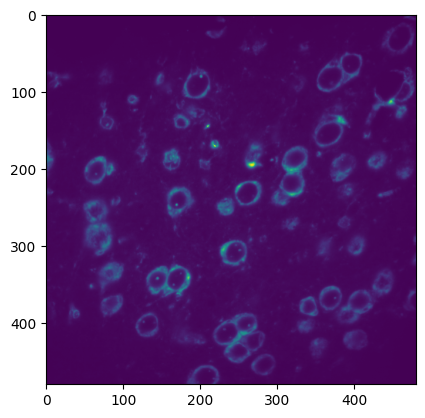

In [151]:
# plot 1 slice of the tile
plt.imshow(tile_data[100])
plt.show()


In [123]:
import s3fs
fs = s3fs.S3FileSystem(anon=False)


# check if zarr_path exists
print(zarr_path)
fs.exists(zarr_path)

s3://aind-open-data/HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr/2


True

In [108]:
# ciomput mean of tile_0_data
tile_0_data.mean().compute()



np.float64(90.87951048062865)

In [72]:
s3_path = f"s3://{bucket_name}/{tile_0_s3}"
tile_0_data = da.from_zarr(tile_0)
tile_0_data.shape





FileNotFoundError: file://HCR_736963_2025-01-09_13-00-00/SPIM.ome.zarr/Tile_X_0000_Y_0000_Z_0000_ch_405.zarr

In [15]:
parsers.XmlParser.extract_tile_transforms(xml_path=xml_path)

{0: [{'@type': 'affine',
   'Name': 'Translation to Nominal Grid',
   'affine': '1.0 0.0 0.0 -5472.0 0.0 1.0 0.0 -7295.0 0.0 0.0 1.0 0.0'},
  {'@type': 'affine',
   'Name': 'Stitching Transform',
   'affine': '1.0 0.0 0.0 -30.29604980903514 0.0 1.0 0.0 95.35672878874175 0.0 0.0 1.0 -7.32590609139254'},
  {'@type': 'affine',
   'Name': 'baked bdv manual transform',
   'affine': '1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0'},
  {'@type': 'affine',
   'Name': 'Stitching Transform',
   'affine': '1.0 0.0 0.0 -2.8744531759034544 0.0 1.0 0.0 -5.6205317490976086 0.0 0.0 1.0 -0.637134739464841'},
  {'@type': 'affine',
   'Name': 'baked bdv manual transform',
   'affine': '1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0'},
  {'@type': 'affine',
   'Name': 'Stitching Transform',
   'affine': '1.0 0.0 0.0 3.019850566216519 0.0 1.0 0.0 3.250734949402613 0.0 0.0 1.0 -0.3164370347167278'},
  {'@type': 'affine',
   'Name': 'baked bdv manual transform',
   'affine': '1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.

In [16]:

parsers.XmlParser.extract_info(xml_path=xml_path)




((0.2466335423895654, 0.2466335423895654, 1.0),
 {0: 'Tile_X_0000_Y_0000_Z_0000_ch_405.zarr',
  1: 'Tile_X_0000_Y_0001_Z_0000_ch_405.zarr',
  2: 'Tile_X_0000_Y_0002_Z_0000_ch_405.zarr',
  3: 'Tile_X_0000_Y_0003_Z_0000_ch_405.zarr',
  4: 'Tile_X_0000_Y_0004_Z_0000_ch_405.zarr',
  5: 'Tile_X_0000_Y_0005_Z_0000_ch_405.zarr',
  6: 'Tile_X_0000_Y_0006_Z_0000_ch_405.zarr',
  7: 'Tile_X_0000_Y_0007_Z_0000_ch_405.zarr',
  8: 'Tile_X_0000_Y_0008_Z_0000_ch_405.zarr',
  9: 'Tile_X_0001_Y_0000_Z_0000_ch_405.zarr',
  10: 'Tile_X_0001_Y_0001_Z_0000_ch_405.zarr',
  11: 'Tile_X_0001_Y_0002_Z_0000_ch_405.zarr',
  12: 'Tile_X_0001_Y_0003_Z_0000_ch_405.zarr',
  13: 'Tile_X_0001_Y_0004_Z_0000_ch_405.zarr',
  14: 'Tile_X_0001_Y_0005_Z_0000_ch_405.zarr',
  15: 'Tile_X_0001_Y_0006_Z_0000_ch_405.zarr',
  16: 'Tile_X_0001_Y_0007_Z_0000_ch_405.zarr',
  17: 'Tile_X_0001_Y_0008_Z_0000_ch_405.zarr',
  18: 'Tile_X_0002_Y_0000_Z_0000_ch_405.zarr',
  19: 'Tile_X_0002_Y_0001_Z_0000_ch_405.zarr',
  20: 'Tile_X_0002_Y_0